# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Abdiel Al Hafiz
- **Email:** hafd324@gmail.com
- **ID Dicoding:** hafdiel

## Menentukan Pertanyaan Bisnis

1. Produk kategori apa yang memiliki rata-rata pendapatan tertinggi per pesanan dalam 6 bulan terakhir?
2. Metode pembayaran mana yang paling sering digunakan oleh pelanggan, dan apakah metode tersebut memengaruhi nilai rata-rata transaksi?
3. Apa pengaruh jarak pengiriman terhadap durasi pengiriman yang lebih dari 30 hari?
4. Kapan terakhir customer melakukan transaksi?
5. Seberapa sering seorang customer melakukan pembelian dalam 6 bulan terakhir?
6. Berapa banyak uang yang dihabiskan customer dalam 6 bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import geopy
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
import time
import os
import zipfile
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

## Download Dataset

In [2]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

with zipfile.ZipFile("brazilian-ecommerce.zip", 'r') as zip_ref:
    zip_ref.extractall("ecommerce_data")

os.listdir("ecommerce_data")

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


['olist_order_payments_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_orders_dataset.csv',
 'product_category_name_translation.csv',
 'olist_sellers_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_geolocation_dataset.csv']

### Gathering Data

#### Load Customers Data

In [3]:
customers_df = pd.read_csv("ecommerce_data/olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Load Products Data

In [4]:
products_df = pd.read_csv("ecommerce_data/olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Load Orders Data

In [5]:
orders_df = pd.read_csv("ecommerce_data/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Load Order Items Data

In [6]:
order_items_df = pd.read_csv("ecommerce_data/olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Load Order Payments Data

In [7]:
orders_pymts_df = pd.read_csv("ecommerce_data/olist_order_payments_dataset.csv")
orders_pymts_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Load Order Reviews Data

In [8]:
order_rvw_df = pd.read_csv("ecommerce_data/olist_order_reviews_dataset.csv")
order_rvw_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Load Sellers Data

In [9]:
sellers_df = pd.read_csv("ecommerce_data/olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Load Geolocation Data

In [10]:
geolocation_df = pd.read_csv("ecommerce_data/olist_geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Load Translasi Nama Produk

In [11]:
translation_df = pd.read_csv('/content/ecommerce_data/product_category_name_translation.csv')
translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

#### Menilai Data Customers

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Dari ouput di atas didapatkan informasi bahwa tidak ada masalah dalam tipe data tiap-tiap kolom. Jumlah datanya juga seimbang sehingga tidak ada missing value di dalamnya.

In [13]:
print('Jumlah duplikasi data: ', customers_df.duplicated().sum())

Jumlah duplikasi data:  0


Terlihat bahwa tidak terdapat duplikasi data pada Customers

#### Menilai Data Products

In [14]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Tidak ada masalah pada tipe data di tiap kolom Products, namun kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty
product_weight_g, product_length_cm, product_height_cm, dan product_width_cm memiliki jumlah yang berbeda dengan product_id. Jumlah yang tidak seimbang ini menandakan adanya missing value pada kolom-kolom tersebut.

In [15]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Dari output di atas nampak bahwa kolom product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty memiliki 610 missing value. Kemudian kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm masing-masing memiliki 2 missing value.

In [16]:
print('Jumlah duplikasi data: ', products_df.duplicated().sum())

Jumlah duplikasi data:  0


Terlihat bahwa tidak ada duplikasi data pada data Products.

#### Menilai Data Orders

In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat ketidakseimbangan data pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date yang menadakan adanya missing value. Kemudian, ketiga kolom tersebut, kolom order_purchase_timestamp, dan order_estimated_delivery_date seharusnya direpresentasikan sebagai tipe data **datetime**, bukan **object**.

In [18]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Nampak jumlah missing value pada kolom order_approved_at sebanyak 160, order_delivered_carrier_date	sebanyak 1783, dan order_delivered_customer_date	sebanyak 2965.

In [19]:
print('Jumlah duplikasi data: ', orders_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak ada duplikasi data Orders.

#### Menilai Data Order Items

In [20]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Hanya terdapat kesalah tipe data pada kolom shipping_limit_date yang seharusnya bertipe **datetime**. Jumlah data terlihat seimbang pada semua kolom sehingga tidak ada indikasi missing value.

In [21]:
print('Jumlah duplikasi data: ', order_items_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak ada duplikasi data pada Order Items

#### Menilai Data Order Payments

In [22]:
orders_pymts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Data terlihat seimbang dan tidak ada masalah pada tipe data di tiap-tiap kolom.

In [23]:
print('Jumlah duplikasi data: ', orders_pymts_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak ditemukan juga duplikasi data pada Payments.

#### Menilai Data Order Reviews

In [24]:
order_rvw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Dapat dilihat bahwa terdapat perbedaan jumlah data pada kolom review_comment_title, dan review_comment_message, ini bisa menjadi pertanda kalau sebagian customer mungkin **malas** memberikan komentar dan hanya memberikan rating erupa skor. Kemudian terdapat kesalahan tipe data untuk kolom review_creation_date, dan review_answer_timestamp yang seharusnya **datetime**.

In [25]:
order_rvw_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Terlihat missing value sebanyak 97658 pada kolom review_comment_title, dan 58247 pada kolom review_comment_message. Seperti penjelasan sebelumnya, karena faktornya kemungkinan customer yang **malas** atau **lupa** maka missing value pada kolom tersebut akan diabaikan terlebih review sudah direpresentasikan oleh skor review, jadi missing value ini akan diabaikan.

In [26]:
print('Jumlah duplikasi data: ', order_rvw_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak ditemukan duplikasi data pada data Order Reviews.

#### Menilai Data Sellers

In [27]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Tipe data tiap kolom nampak normal begitupun jumlah datanya.

In [28]:
print('Jumlah duplikasi data: ', sellers_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak ditemukan adanya duplikasi data pada data Sellers.

#### Menilai Data Geolocation

In [29]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Tidak ada masalah pada tipe data dan jumlahnya di tiap tiap kolom.

In [30]:
print('Jumlah duplikasi data: ', geolocation_df.duplicated().sum())

Jumlah duplikasi data:  261831


Meskipun terdapat 261831 duplikasi data, mempertimbangkan bahwa geolocation merepresentasikan lokasi, ini bisa dikarenakan ada kesamaan lokasi pada banyak customer yang bisa diwajarkan dan tidak perlu penanganan lebih lanjut.

#### Menilai Data Translasi Nama Produk

In [31]:
translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Tidak terlihat ada masalah dalam jumlah dan tipe data pada tiap kolom.

In [32]:
print('Jumlah duplikasi data: ', translation_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak ditemukan adanya duplikasi data.

### Cleaning Data

Data-data yang dibersihkan hanyalah data yang perlu atau yang akan digunakan dalam proses analisis untuk menjawab keenam pertanyaan.

#### Membersihkan Orders Data

##### Mengganti Tipe Data
Mengubah tipe data kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date menjadi datetime.

In [33]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Sekarang, tipe data kolom-kolom tersebut sudah dipebaiki menjadi datetime.

##### Mengatasi Missing Value

In [35]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Meskipun terdapat banyak missing value di kolom-kolom tanggal, namun proses cleaning pada kolom order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date hanya akan dilakukan ke order status 'delivered'.

Hal ini dikarenakan nantinya akan dilakukan analisis lama waktu pengiriman pesanan, yang mana order status 'delivered' berarti pesanan telah dikirim.

In [36]:
delivered_orders = orders_df[orders_df['order_status'] == 'delivered']

missing_values_summary = delivered_orders[['order_approved_at',
                                           'order_delivered_carrier_date',
                                           'order_delivered_customer_date']].isna().sum()

print("Jumlah missing value pada kolom-kolom tanggal untuk status 'delivered':")
print(missing_values_summary)


Jumlah missing value pada kolom-kolom tanggal untuk status 'delivered':
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
dtype: int64


Dari sini terlihat untuk order status 'delivered' terdapat 14 missing value pada order_approved_at, 2 missing value pada order_delivered_carrier_date dan 8 missing value pada order_delivered_customer_date. Akan dilakukan metode imputation pada kolom-kolom tersebut dengan mengisi waktu rata-rata dari satu kolom ke kolom berikutnya:
- order_approved_at: Diisi dengan rata-rata durasi antara order_delivered_at dan order_purchase_timestamp.
- order_delivered_carrier_date: Diisi dengan rata-rata durasi antara order_delivered_carrier_date dan order_approved_at.
- order_delivered_customer_date: Diisi dengan rata-rata durasi antara order_delivered_customer_date dan order_delivered_carrier_date.

Sebelum itu, kita akan membuat kolom baru yang berisi lama waktu pengiriman pesanan.

In [37]:
delivered_orders['order_delivered_customer_date'] = pd.to_datetime(delivered_orders['order_delivered_customer_date'])
delivered_orders['order_delivered_carrier_date'] = pd.to_datetime(delivered_orders['order_delivered_carrier_date'])

delivered_orders['delivery_duration_days'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_delivered_carrier_date']).dt.days


In [38]:
delivered_orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration_days
count,96478,96478,96478,96478,96464,96476,96470,96478,96469.000000
unique,96478,96478,1,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:29:31.939913984,2018-01-02 10:53:23.338012160,2018-01-05 05:01:50.912330240,2018-01-14 12:41:33.581683456,2018-01-25 17:09:52.325711616,8.878054
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,-17.000000
25%,NaN,NaN,NaN,2017-09-14 09:00:23.249999872,2017-09-14 14:48:54,2017-09-18 16:46:13.249999872,2017-09-25 22:15:09.500000,2017-10-05 00:00:00,4.000000
50%,NaN,NaN,NaN,2018-01-20 19:45:45,2018-01-22 13:50:04,2018-01-24 16:13:47.500000,2018-02-02 19:32:21,2018-02-16 00:00:00,7.000000
75%,NaN,NaN,NaN,2018-05-05 18:54:47,2018-05-06 10:57:24.750000128,2018-05-08 14:35:00,2018-05-15 22:54:48.500000,2018-05-28 00:00:00,12.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,205.000000


Dari output di atas, nampak bahwa nilai min pada delivery_duration_days adalah -17 hari. Ini menandakan adanya kesalahan dalam penulisan/perekaman data, kita akan mencoba memperbaikinya dengan mengganti tanggal menggunakan rata-rata waktu pengiriman yang nilainya positif.

In [39]:
# 1. Menghitung durasi positif untuk perhitungan rata-rata
valid_approved_at_duration = (delivered_orders['order_approved_at'] - delivered_orders['order_purchase_timestamp']).dt.total_seconds()
valid_approved_at_duration = valid_approved_at_duration[valid_approved_at_duration > 0]

valid_carrier_date_duration = (delivered_orders['order_delivered_carrier_date'] - delivered_orders['order_approved_at']).dt.total_seconds()
valid_carrier_date_duration = valid_carrier_date_duration[valid_carrier_date_duration > 0]

valid_customer_date_duration = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_delivered_carrier_date']).dt.total_seconds()
valid_customer_date_duration = valid_customer_date_duration[valid_customer_date_duration > 0]

# 2. Menghitung rata-rata durasi pengiriman yang valid
average_approved_at_duration = valid_approved_at_duration.mean()
average_carrier_date_duration = valid_carrier_date_duration.mean()
average_customer_date_duration = valid_customer_date_duration.mean()

# 3. Mengisi missing values dengan rata-rata durasi yang valid
# Isi missing value pada 'order_approved_at'
delivered_orders['order_approved_at'] = delivered_orders['order_approved_at'].fillna(
    delivered_orders['order_purchase_timestamp'] + pd.to_timedelta(average_approved_at_duration, unit='s')
)

delivered_orders['order_delivered_carrier_date'] = delivered_orders['order_delivered_carrier_date'].fillna(
    delivered_orders['order_approved_at'] + pd.to_timedelta(average_carrier_date_duration, unit='s')
)

# Isi missing value pada 'order_delivered_customer_date'
delivered_orders['order_delivered_customer_date'] = delivered_orders['order_delivered_customer_date'].fillna(
    delivered_orders['order_delivered_carrier_date'] + pd.to_timedelta(average_customer_date_duration, unit='s')
)

# 4. Menghitung durasi pengiriman (dalam hari) untuk kolom 'delivery_duration_days'
# Ini untuk menghitung durasi antara 'order_delivered_customer_date' dan 'order_delivered_carrier_date'
delivered_orders['delivery_duration_days'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_delivered_carrier_date']).dt.total_seconds() / (60 * 60 * 24)

# 5. Mengganti nilai negatif pada 'delivery_duration_days' dengan perhitungan baru berdasarkan rata-rata durasi yang valid
# Jika delivery_duration_days negatif, kita ganti tanggal order_delivered_customer_date dengan menambahkan rata-rata durasi pengiriman
for index, row in delivered_orders.iterrows():
    if row['delivery_duration_days'] < 0:
        new_delivery_date = row['order_delivered_carrier_date'] + pd.to_timedelta(average_customer_date_duration, unit='s')
        delivered_orders.at[index, 'order_delivered_customer_date'] = new_delivery_date
        delivered_orders.at[index, 'delivery_duration_days'] = (delivered_orders.at[index, 'order_delivered_customer_date'] - row['order_delivered_carrier_date']).days



In [40]:
delivered_orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration_days
count,96478,96478,96478,96478,96478,96478,96478,96478,96478.000000
unique,96478,96478,1,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:29:31.939913984,2018-01-02 09:46:08.371294976,2018-01-05 04:57:07.605258496,2018-01-14 12:57:40.944798208,2018-01-25 17:09:52.325711616,9.333640
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0.000000
25%,NaN,NaN,NaN,2017-09-14 09:00:23.249999872,2017-09-14 13:30:21.249999872,2017-09-18 16:44:13.750000128,2017-09-25 22:18:14.500000,2017-10-05 00:00:00,4.103701
50%,NaN,NaN,NaN,2018-01-20 19:45:45,2018-01-22 13:48:43.500000,2018-01-24 16:10:58,2018-02-02 19:41:06,2018-02-16 00:00:00,7.101053
75%,NaN,NaN,NaN,2018-05-05 18:54:47,2018-05-06 10:52:59.249999872,2018-05-08 14:34:45,2018-05-15 23:09:25.750000128,2018-05-28 00:00:00,12.028571
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,205.190972


Terlihat dari data di atas sudah tidak ada nilai negatif pada nilai min delivery_duration_days.

In [41]:
delivered_orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
delivery_duration_days,0


Sekarang masalah missing value dan durasi pengiriman yang negatif pada Orders data dengan status 'delivered' sudah teratasi.

#### Membersihkan Order Items Data

##### Mengganti Tipe Data

Mengganti tipe data kolom shipping_limit_date ke datetime.

In [42]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [43]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Sekarang, tipe data shipping_limit_date sudah tepat yaitu menjadi datetime.

### Membersihkan Products Data

#### Mengatasi Missing Value

In [44]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Dalam mengatasi missing value di dataset Products, berikut adalah langkah yang akan diambil:
- product_category_name akan diisi dengan 'unknown'
- product_name_lenght dan product_description_lenght akan diisi sejumlah panjang teks 'unknown' yaitu 6.
- product_photo_qty, product_weight_g, product_lenght_cm, product_height_cm, dan product_width_cm akan diisi dengan rata-rata berdasarkan kategori produk yang sama. Jika missing value terdapat pada kategori 'uknown', maka akan diisi dengan 0.

In [45]:
products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown')

products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(6)
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(6)

In [46]:
fill_columns = ['product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for column in fill_columns:
    products_df.loc[products_df['product_category_name'] == 'unknown', column] = products_df.loc[
        products_df['product_category_name'] == 'unknown', column].fillna(0)

    products_df[column] = products_df.groupby('product_category_name')[column].transform(
        lambda x: x.fillna(x.mean())
    )

In [47]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Sekarang, missing value di Products data sudah teratasi.

## Exploratory Data Analysis (EDA)

### Eksplorasi Customers Data

In [48]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Dari output di atas didapatkan beberapa informasi diantaranya:
- Ada beberapa pelanggan yang melakukan lebih dari satu transaksi, terlihat adanya pengulangan customer_unique_id.
- Kode pos pelanggan tersebar luas, menandakan jangkauan e-commerce yang luas di Brazil.
- Dari 4119 kota, São Paulo mendominasi, menjadikannya pusat pelanggan utama.


### Eksplorasi Products Data

In [49]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,47.690601,757.324178,2.148463,2276.445243,30.814335,16.937289,23.196192
std,NaN,NaN,11.654017,637.613671,1.745732,4281.933875,16.914833,13.637484,12.079395
min,NaN,NaN,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Dari data tersebut nampak bahwa dari berbagai kategori produk, cama_mesa_banho (kategori perabot rumah seperti tempat tidur, meja, dan kamar mandi) memiliki frekuensi terbanyak yaitu 3029 produk yang menunjukan kategori ini memiliki banyak variasi produk.

### Eksplorasi Orders Data

In [50]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


Dari data tersebut bisa dikatakan sebanyak 96478 pesanan berhasil dikirim dengan status 'delivered'. Selanjutnya kita akan mencoba menghitung lama waktu pesanan dengan status 'delivered' dikirimkan.

#### Analisis Lama Waktu Pengiriman pada Pesanan dengan status 'delivered'
Seperti yang sudah dibahas pada tahap cleaning data Orders, hanya pesanan dengan order status 'delivered' saja yang akan digunakan pada tahap analisis ini. Dengan data yang sudah dibersihkan pada delivered_orders, selanjutnya akan dianalisis lama waktu pengiriman pesanan.

In [51]:
delivered_orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration_days
count,96478,96478,96478,96478,96478,96478,96478,96478,96478.000000
unique,96478,96478,1,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:29:31.939913984,2018-01-02 09:46:08.371294976,2018-01-05 04:57:07.605258496,2018-01-14 12:57:40.944798208,2018-01-25 17:09:52.325711616,9.333640
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0.000000
25%,NaN,NaN,NaN,2017-09-14 09:00:23.249999872,2017-09-14 13:30:21.249999872,2017-09-18 16:44:13.750000128,2017-09-25 22:18:14.500000,2017-10-05 00:00:00,4.103701
50%,NaN,NaN,NaN,2018-01-20 19:45:45,2018-01-22 13:48:43.500000,2018-01-24 16:10:58,2018-02-02 19:41:06,2018-02-16 00:00:00,7.101053
75%,NaN,NaN,NaN,2018-05-05 18:54:47,2018-05-06 10:52:59.249999872,2018-05-08 14:34:45,2018-05-15 23:09:25.750000128,2018-05-28 00:00:00,12.028571
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,205.190972


Dari data di atas diapatkan beberapa informasi diantaranya:
- Durasi rata-rata pengiriman adalah sekitar 9,33 hari. Ini memberikan gambaran bahwa sebagian besar pengiriman berada dalam rentang waktu yang relatif standar, namun informasi lebih lanjut diperlukan untuk memahami apakah ini merupakan waktu pengiriman yang efisien atau tidak.
- Durasi pengiriman paling cepat adalah 0 hari, yang menunjukkan bahwa pengiriman mungkin dihitung sebagai 0 hari karena pengirimannya same day atau kurang dari 24 jam.
- Nilai median (50%) berada di sekitar 7,1 hari. Ini berarti bahwa separuh dari pengiriman diselesaikan dalam waktu kurang dari 7 hari, yang bisa dianggap cukup cepat untuk pengiriman barang e-commerce. Namun, distribusi juga menunjukkan bahwa ada banyak pengiriman yang memerlukan waktu lebih lama, dengan 25% di antaranya melebihi 12 hari.


#### Analisis Pengiriman Pesanan dengan Status 'delivered' yang lebih dari 30 Hari

Untuk menganalisis lebih dalam, tentu akan menarik jika kita mencari tau apa penyebab menjadi sangat lama durasi sebuah pengiriman pesanan. Apakah karena skala Internasional yang memiliki jarak yang sangat jauh? Atau mungkin jaraknya tidak sejauh itu, namun ada masalah logistik? Mari kita cari tahu!

In [52]:
delivered_orders_copy = delivered_orders.copy()
filtered_orders = delivered_orders_copy[delivered_orders_copy['delivery_duration_days'] >= 30]

filtered_orders = filtered_orders.merge(
    customers_df[['customer_id', 'customer_zip_code_prefix']],
    on='customer_id',
    how='left'
)

filtered_orders = filtered_orders.merge(
    order_items_df[['order_id', 'seller_id']].drop_duplicates(),
    on='order_id',
    how='left'
)

filtered_orders = filtered_orders.merge(
    sellers_df[['seller_id', 'seller_zip_code_prefix']],
    on='seller_id',
    how='left'
)

In [53]:
filtered_orders = filtered_orders.drop_duplicates(subset=['order_id'], keep='first')

duplicate_orders = filtered_orders[filtered_orders.duplicated(subset=['order_id'])]
print(f"Jumlah duplikasi setelah dihapus: {len(duplicate_orders)}")

filtered_orders = filtered_orders.merge(
    geolocation_df[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city']].drop_duplicates(),
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

filtered_orders.rename(columns={
    'geolocation_lat': 'geolocation_lat_customer',
    'geolocation_lng': 'geolocation_lng_customer',
    'geolocation_city': 'geolocation_city_customer'
}, inplace=True)

Jumlah duplikasi setelah dihapus: 0


In [54]:
filtered_orders = filtered_orders.drop_duplicates(subset=['order_id'], keep='first')

duplicate_orders = filtered_orders[filtered_orders.duplicated(subset=['order_id'])]
print(f"Jumlah duplikasi setelah dihapus: {len(duplicate_orders)}")

filtered_orders = filtered_orders.merge(
    geolocation_df[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city']].drop_duplicates(),
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

filtered_orders.rename(columns={
    'geolocation_lat': 'geolocation_lat_seller',
    'geolocation_lng': 'geolocation_lng_seller',
    'geolocation_city': 'geolocation_city_seller'
}, inplace=True)


Jumlah duplikasi setelah dihapus: 0


In [55]:
filtered_orders = filtered_orders.drop_duplicates(subset=['order_id'], keep='first')

duplicate_orders = filtered_orders[filtered_orders.duplicated(subset=['order_id'])]
print(f"Jumlah duplikasi setelah dihapus: {len(duplicate_orders)}")

Jumlah duplikasi setelah dihapus: 0


Setiap tahapan merging di atas selalu melakukan pengecekan duplikasi untuk menghindari penggunaan memori berlebih.

In [56]:
filtered_orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
delivery_duration_days,0
customer_zip_code_prefix,0


Ada beberapa kolom yang memiliki missing value, geolocation_zip_code_prefix_x merepresentasikan kode prefix lokasi customer di mana terdapat 13 missing value yang menandakan ada 13 customer juga yang lokasinya tidak teridentifikasi.

Begitupun geolocation_zip_code_prefix_y yang merepresentasikan kode prefix lokasi seller di mana terdapat 7 missing value yang berarti ada 7 seller tidak teridentifikasi lokasinya.

Meskipun begitu dibandingkan dengan total 2687 data pada filtered_orders, total jumlah missing value yang hanya 20 data tidak akan terlalu berpengaruh pada proses analisis sehingga nantinya akan dihapus saja.

In [57]:
filtered_orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration_days,customer_zip_code_prefix,seller_id,seller_zip_code_prefix,geolocation_zip_code_prefix_x,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_zip_code_prefix_y,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller
count,2687,2687,2687,2687,2687,2687,2687,2687,2687.000000,2687.000000,2687,2687.000000,2674.000000,2674.000000,2674.000000,2674,2680.000000,2680.000000,2680.000000,2680
unique,2687,2687,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,767,NaN,NaN,NaN,NaN,794,NaN,NaN,NaN,271
top,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4869f7a5dfa277a7dca6462dcf3b52b2,NaN,NaN,NaN,NaN,rio de janeiro,NaN,NaN,NaN,sao paulo
freq,1,1,2687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,NaN,352,NaN,NaN,NaN,449
mean,NaN,NaN,NaN,2017-12-30 01:37:48.771864576,2017-12-30 11:29:23.770747904,2018-01-02 13:36:34.914427648,2018-02-14 07:14:14.182359552,2018-01-27 19:35:15.519166208,42.734482,47916.828805,NaN,23175.445850,47895.608826,-17.313175,-44.413006,NaN,23177.345896,-22.563189,-47.362272,NaN
min,NaN,NaN,NaN,2016-10-10 00:01:50,2016-10-10 15:44:46,2016-10-14 18:00:00,2016-11-16 17:17:53,2016-12-14 00:00:00,30.003854,1140.000000,NaN,1021.000000,1140.000000,-34.586422,-72.666706,NaN,1021.000000,-30.159469,-61.957201,NaN
25%,NaN,NaN,NaN,2017-11-25 15:53:40,2017-11-25 20:03:52,2017-11-29 18:24:11.500000,2018-01-08 03:00:06.500000,2017-12-21 00:00:00,33.200631,24751.500000,NaN,8577.000000,24744.250000,-22.949812,-48.400944,NaN,8577.000000,-23.555682,-48.831547,NaN
50%,NaN,NaN,NaN,2018-02-07 13:12:07,2018-02-07 17:35:36,2018-02-09 23:14:58,2018-03-23 21:12:23,2018-03-08 00:00:00,37.292766,45836.000000,NaN,14085.000000,45883.000000,-21.819464,-43.397063,NaN,14085.000000,-23.013560,-46.895859,NaN
75%,NaN,NaN,NaN,2018-03-09 13:47:12.500000,2018-03-09 16:32:47.500000,2018-03-12 21:29:10.500000,2018-04-23 16:39:42,2018-04-05 00:00:00,44.455498,66963.500000,NaN,21840.000000,66891.750000,-9.416671,-40.503627,NaN,21840.000000,-21.766477,-46.527231,NaN
max,NaN,NaN,NaN,2018-08-05 17:11:44,2018-08-05 17:31:19,2018-08-07 16:59:00,2018-10-17 13:22:46,2018-09-03 00:00:00,205.190972,99700.000000,NaN,98975.000000,99700.000000,39.057629,-9.400037,NaN,98975.000000,-2.546079,-34.918399,NaN


Dari data di atas didapatkan beberapa informasi:
- Nampak bawah rata-rata durasi pengiriman adalah 42.73 hari atau dibulatkan menjadi 43 hari menunjukkan adanya masalah dalam efisiensi logistik untuk pesanan dengan durasi pengiriman di atas 30 hari.
- Durasi pengiriman maksimal 205,19 hari menandakan bahwa ada outlier yang signifikan, yang dapat menjadi tanda proses pengiriman bermasalah, seperti kendala logistik, administrasi, atau jarak yang sangat jauh.
- Rio de Janeiro sebagai kota pelanggan terbanyak menunjukkan bahwa kota ini menjadi salah satu pasar utama bagi e-commerce di dataset ini. Sedangkan São Paulo sebagai kota penjual terbanyak menandakan bahwa sebagian besar barang berasal dari kota ini, yang kemungkinan merupakan pusat distribusi besar atau lokasi banyak penjual.

  Meskipun kedua kota berada di negara yang sama (Brazil), durasi pengiriman tetap lama. Hal ini mengindikasikan bahwa jarak geografis bukan satu-satunya penyebab keterlambatan, tetapi mungkin dipengaruhi oleh faktor lain, seperti infrastruktur, logistik, atau kebijakan pengiriman.
  
  Catatan bahwa durasi dalam angka desimal disebabkan oleh konversi dari detik ke hari memberikan informasi tambahan tentang presisi data yang digunakan.

#### Analisis Pengiriman dengan Durasi Terlama dan Jarak Terjauh
Apakah jarak menjadi faktor utama? Untuk mengetahuinya, sekarang kita akan mengecek jarak lokasi untuk pengiriman terlama dan terjauh untuk dianalisis lebih lanjut, di tahap ini data yang mengandung nilai null sebelumnya akan dihapus.

In [58]:
def calculate_distance(row):
    if pd.isna(row['geolocation_lat_customer']) or pd.isna(row['geolocation_lng_customer']) or pd.isna(row['geolocation_lat_seller']) or pd.isna(row['geolocation_lng_seller']):
        return None
    customer_coords = (row['geolocation_lat_customer'], row['geolocation_lng_customer'])
    seller_coords = (row['geolocation_lat_seller'], row['geolocation_lng_seller'])
    return geodesic(customer_coords, seller_coords).km

filtered_orders['distance_km'] = filtered_orders.apply(calculate_distance, axis=1)

# Buang baris yang memiliki jarak None (NaN)
filtered_orders_clean = filtered_orders.dropna(subset=['distance_km'])

In [59]:
filtered_data = filtered_orders_clean[
    (filtered_orders_clean['delivery_duration_days'] > 200) | (filtered_orders_clean['distance_km'] > 7000)
]

selected_columns = [
    'geolocation_city_customer',
    'geolocation_city_seller',
    'distance_km',
    'delivery_duration_days'
]

filtered_data[selected_columns]

,geolocation_city_customer,geolocation_city_seller,distance_km,delivery_duration_days
165125,rio de janeiro,sao paulo,327.389002,205.190972
221359,areia branca dos assis,guarulhos,7924.621742,47.689421


Melihat sesuatu yang aneh? Perhatikan baris data kedua, bagaimana bisa ketika kota customer dan seller ada di satu negara yang sama, namun jarak pengirimannya sejauh hampir 8000km. Apakah kota customer tidak selalu merepresentasikan kota tujuan pengiriman? Atau apakah kota seller tidak selalu merepresentasikan kota asal pengiriman? Mari kita cek dengan mencari kota asal dan tujuan lewat titik koordinat pada data.

In [60]:
geolocator = Nominatim(user_agent="my_filtered_orders_project")
geo_cache = {}

def get_city_from_coordinates(lat, lng):
    try:
        if (lat, lng) in geo_cache:
            return geo_cache[(lat, lng)]

        if not (pd.isna(lat) or pd.isna(lng)):
            location = geolocator.reverse((lat, lng), timeout=10)
            if location and 'address' in location.raw:
                city = location.raw['address'].get('city') or \
                       location.raw['address'].get('town') or \
                       location.raw['address'].get('village')

                geo_cache[(lat, lng)] = city
                return city
        return None
    except (GeocoderTimedOut, GeocoderUnavailable):
        time.sleep(1)
        return get_city_from_coordinates(lat, lng)
    except Exception as e:
        print(f"Error on coordinates ({lat}, {lng}): {e}")
        return None

filtered_data['city_customer_from_coordinates'] = filtered_data.apply(
    lambda row: get_city_from_coordinates(row['geolocation_lat_customer'], row['geolocation_lng_customer']), axis=1
)
filtered_data['city_seller_from_coordinates'] = filtered_data.apply(
    lambda row: get_city_from_coordinates(row['geolocation_lat_seller'], row['geolocation_lng_seller']), axis=1
)

In [61]:
selected_columns = [
    'geolocation_city_customer',
    'city_customer_from_coordinates',
    'geolocation_city_seller',
    'city_seller_from_coordinates',
    'distance_km',
    'delivery_duration_days'
]

filtered_data[selected_columns]

,geolocation_city_customer,city_customer_from_coordinates,geolocation_city_seller,city_seller_from_coordinates,distance_km,delivery_duration_days
165125,rio de janeiro,Rio de Janeiro,sao paulo,São Paulo,327.389002,205.190972
221359,areia branca dos assis,Mafra,guarulhos,Guarulhos,7924.621742,47.689421


Untuk data pertama, kota customer dan seller sudah cocok dengan koordinat. Akan tetapi untuk data kedua, kota tujuan pengiriman customer ternyata bukan areia branca dos assis, melainkan kota Mafra di Portugal, jadi sangatlah wajar jika jaraknya mencapai ribuan kilometer. Dari sini dapat dilihat bahwa koordinat customer ataupun seller bisa merepresentasikan kota yang berbeda dari data kota yang sudah ada.

Selain itu waktu tempuh yang lebih singkat meskipun pengiriman berbeda negara bisa terjadi karena penggunaan jalur udara atau layanan premium dari pihak jasa logistik.

Sedangkan yang masih satu negara namun waktu pengirimanya sampai 205 hari ini bisa terjadi karena kesalahan pada pihak logistik, serta kebijakan yang menghalangi atau memperlambat laju pengiriman.

## Visualization & Explanatory Analysis

### Pertanyaan Pertama: Produk kategori apa yang memiliki rata-rata pendapatan tertinggi per pesanan dalam 6 bulan terakhir?



In [62]:
orders_df = orders_df.sort_values(by='order_purchase_timestamp')

latest_date = orders_df['order_purchase_timestamp'].max()
last_six_months = latest_date - timedelta(days=180)

recent_orders_df = orders_df[
    (orders_df['order_purchase_timestamp'] >= last_six_months) &
    (orders_df['order_purchase_timestamp'] <= latest_date)
]

In [63]:
merged_df = pd.merge(recent_orders_df, order_items_df, on='order_id', how='inner')
merged_df = pd.merge(merged_df, products_df, on='product_id', how='inner')
merged_df = pd.merge(merged_df, orders_pymts_df, on='order_id', how='inner')

merged_df = pd.merge(
    merged_df,
    translation_df[['product_category_name', 'product_category_name_english']],
    on='product_category_name',
    how='left'
)

merged_df['total_revenue'] = merged_df['price'] + merged_df['freight_value']

category_stats = merged_df.groupby('product_category_name_english').agg(
    average_revenue=('total_revenue', 'mean'),
    products_sold=('order_item_id', 'count')
  ).reset_index()

category_stats = category_stats.sort_values(by='average_revenue', ascending=False)

In [64]:
print('Kategori Produk dengan Rata-Rata Pendapatan Tertinggi Selama 6 Bulan Terakhir\n')
category_stats = category_stats.reset_index(drop=True)
category_stats.head()

Kategori Produk dengan Rata-Rata Pendapatan Tertinggi Selama 6 Bulan Terakhir



,product_category_name_english,average_revenue,products_sold
0,computers,957.195957,47
1,home_appliances_2,598.570388,103
2,small_appliances_home_oven_and_coffee,578.062128,47
3,musical_instruments,344.552417,211
4,agro_industry_and_commerce,329.673239,71


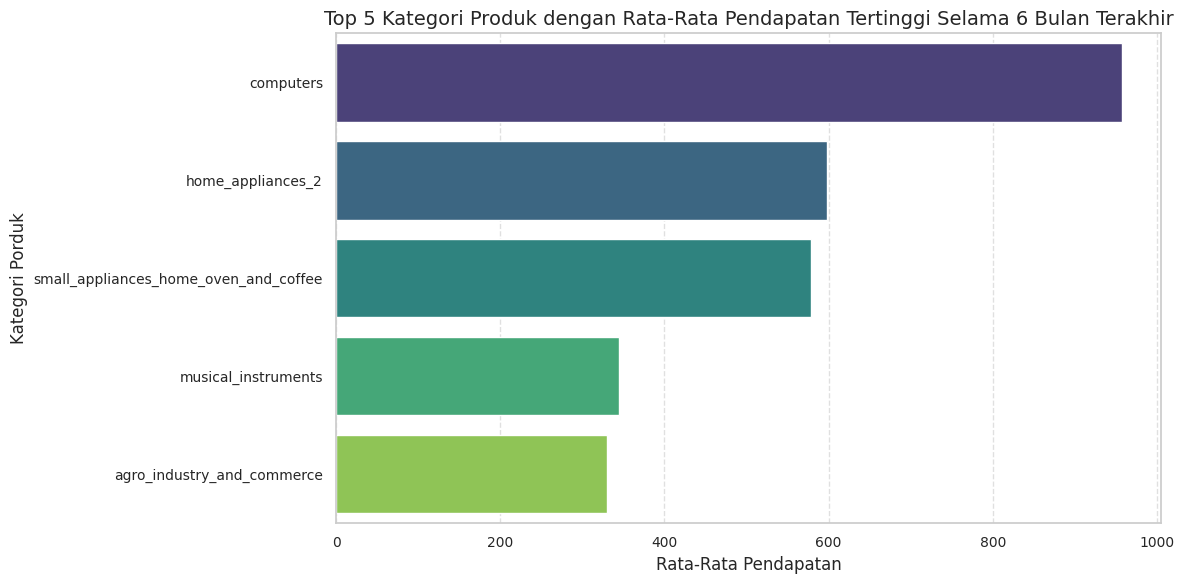

In [65]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
plt.title('Top 5 Kategori Produk dengan Rata-Rata Pendapatan Tertinggi Selama 6 Bulan Terakhir', fontsize=14)

top_5_categories = category_stats.head(5)

barplot = sns.barplot(
    data=top_5_categories,
    x='average_revenue',
    y='product_category_name_english',
    palette='viridis'
)

plt.xlabel('Rata-Rata Pendapatan', fontsize=12)
plt.ylabel('Kategori Porduk', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Insight**:
1. Ketgori "Computers" Memiliki Rata-Rata Pendapatan Tertinggi
  - Kategori "computers" memiliki rata-rata pendapatan (average revenue) tertinggi, yaitu 957.2 dengan 47 produk terjual. Ini menunjukkan bahwa produk komputer memiliki kontribusi yang lebih besar dalam hal pendapatan per pesanan dibandingkan kategori lainnya.
  - Meskipun memiliki pendapatan rata-rata yang tinggi, penjualan produk di kategori ini relatif rendah (hanya 47 produk). Hal ini dapat berarti bahwa produk di kategori ini mungkin memiliki harga yang lebih tinggi, tetapi volume penjualannya terbatas. Penjualan yang lebih rendah bisa mengindikasikan bahwa produk tersebut lebih eksklusif atau memiliki permintaan yang lebih terbatas. Hal ini juga terjadi pada kategori small_appliances_home_oven_and_coffee.

2. Kategori "Musical Instruments" Memiliki Volume Penjualan Tinggi dan Pendapatan Rata-Rata yang Relatif Lebih Rendah
  - Kategori "musical_instruments" memiliki jumlah produk terjual yang sangat tinggi (211 produk), tetapi rata-rata pendapatannya lebih rendah (344.55). Ini menunjukkan bahwa meskipun kategori ini memiliki penjualan yang tinggi, pendapatan per unit cenderung lebih rendah.
  - Tingginya volume penjualan tidak berbanding lurus dengan pendapatan yang dihasilkan per produk. Hal ini bisa jadi karena produk dalam kategori "musical_instruments" memiliki harga yang lebih terjangkau, sehingga meskipun terjual banyak unit, pendapatan per transaksi tidak sebesar kategori lain.

### Pertanyaan Kedua: Metode pembayaran mana yang paling sering digunakan oleh pelanggan, dan apakah metode tersebut memengaruhi nilai rata-rata transaksi?

In [66]:
payment_stats = orders_pymts_df.groupby('payment_type').agg(
    frequency=('payment_type', 'count'),
    avg_transaction=('payment_value', 'mean')
).reset_index()

payment_stats  = payment_stats.sort_values(by='frequency', ascending=False)

In [67]:
payment_stats

,payment_type,frequency,avg_transaction
1,credit_card,76795,163.319021
0,boleto,19784,145.034435
4,voucher,5775,65.703354
2,debit_card,1529,142.570170
3,not_defined,3,0.000000


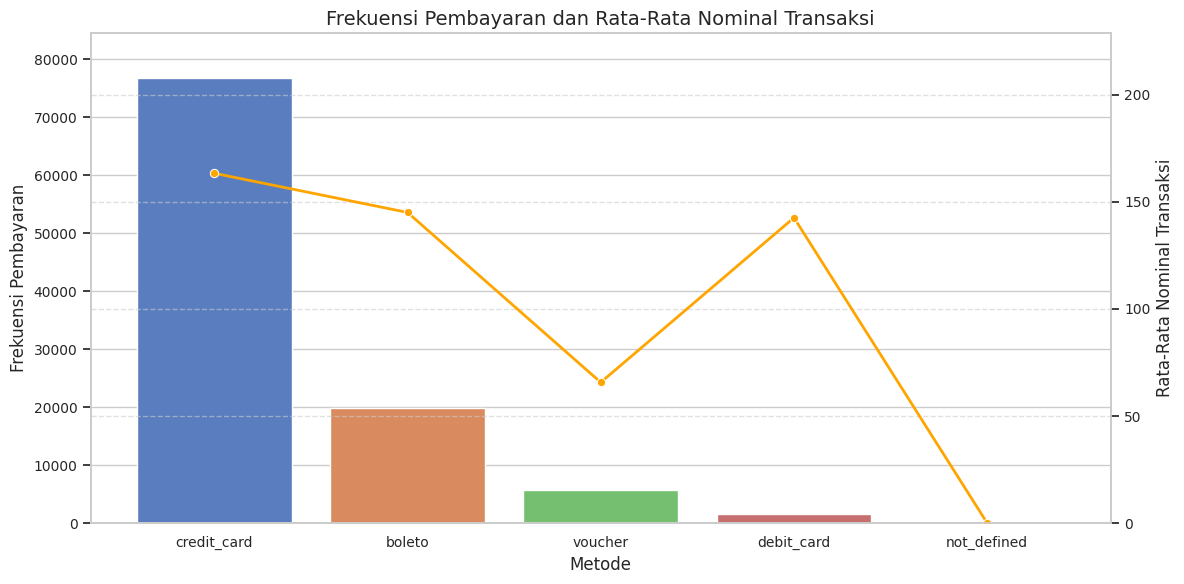

In [68]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(
    data=payment_stats,
    x='payment_type',
    y='frequency',
    palette='muted',
    ax=ax1
)
ax1.set_ylabel('Frekuensi Pembayaran', fontsize=12)
ax1.set_xlabel('Metode', fontsize=12)
ax1.tick_params(axis='y', labelsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax1.set_ylim(0, payment_stats['frequency'].max() * 1.1)

ax2 = ax1.twinx()
line_plot = sns.lineplot(
    data=payment_stats,
    x='payment_type',
    y='avg_transaction',
    color='orange',
    marker='o',
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel('Rata-Rata Nominal Transaksi', fontsize=12)
ax2.tick_params(axis='y', labelsize=10)
ax2.set_ylim(0, payment_stats['avg_transaction'].max() * 1.4)

plt.title('Frekuensi Pembayaran dan Rata-Rata Nominal Transaksi', fontsize=14)
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Insight:**
1. Metode Pembayaran Credit Card Memiliki Frekuensi Pembayaran Tertinggi
  - Credit card adalah metode pembayaran yang paling sering digunakan dengan frekuensi 76,795 transaksi. Rata-rata nominal transaksi untuk metode ini juga tinggi, yaitu 163.32.
  - Meskipun memiliki frekuensi transaksi yang sangat tinggi dan nominal transaksi yang relatif besar, perlu diperhatikan apakah faktor lain seperti biaya transaksi atau pengguna yang lebih loyal memengaruhi hasil ini. Bisa jadi, frekuensi tinggi ini mencerminkan kenyamanan dan kepercayaan pengguna terhadap metode pembayaran ini, tetapi tidak serta-merta menunjukkan keberhasilan bisnis dalam jangka panjang.

2. Metode Pembayaran Boleto Memiliki Frekuensi Pembayaran yang Signifikan Namun dengan Nominal Transaksi Lebih Rendah
  - Boleto memiliki frekuensi pembayaran yang cukup besar, yaitu 19,784 transaksi. Namun, rata-rata nominal transaksi untuk metode ini adalah 145.03, yang lebih rendah dibandingkan dengan kartu kredit.
  - Meskipun frekuensi pembayaran cukup tinggi, nominal transaksi yang lebih rendah bisa jadi menunjukkan bahwa produk yang dibeli menggunakan "boleto" adalah barang dengan harga yang lebih terjangkau. Di beberapa pasar, boleto digunakan lebih untuk transaksi dengan harga rendah.

3. Metode Pembayaran Voucher Memiliki Frekuensi Pembayaran yang Lebih Rendah dan Nominal Transaksi yang Paling Rendah
  - Voucher memiliki frekuensi 5,775 transaksi dan nominal transaksi yang sangat rendah, yaitu 65.70.
  - Penggunaan voucher cenderung lebih sering terjadi pada transaksi dengan diskon atau produk dengan harga lebih rendah. Hal ini perlu dilihat apakah voucher lebih banyak digunakan oleh pelanggan yang mencari diskon atau insentif lainnya. Jika demikian, hal ini mungkin menunjukkan bahwa voucher tidak terlalu efektif dalam meningkatkan nilai transaksi dibandingkan metode lain.

4. Metode Pembayaran Debit Card Memiliki Frekuensi Pembayaran yang Lebih Rendah dengan Nominal Transaksi yang Hampir menyamai Credit Card
  - Debit card memiliki frekuensi transaksi yang jauh lebih rendah dibandingkan dengan credit card, yaitu 1,529 transaksi, dengan nominal transaksi 142.57, sedikit lebih rendah dari kartu kredit namun lebih tinggi daripada boleto dan voucher.
  - Penggunaan kartu debit yang rendah bisa menunjukkan ketergantungan yang lebih besar pada kartu kredit pada *market*. Namun, nominal transaksi yang lebih rendah daripada kartu kredit mungkin mencerminkan bahwa banyak transaksi dilakukan dengan saldo lebih terbatas.

5. Kategori "Not Defined" yang Memiliki Frekuensi dan Nilai Transaksi Nol
  - Meskipun frekuensinya terbilang kecil, yaitu hanya 3, Ini tetap menandakan adanya transaksi yang gagal atau teridentifikasi tidak lengkap, jumlahnya yang kecil belum berpengaruh besar dalam analisis dan pengambilan keputusan. Namun disarankan tindakan lebih lanjut untuk memperoleh data yang lebih akurat dan terstruktur.

### Pertanyaan Ketiga: Apa pengaruh jarak pengiriman terhadap durasi pengiriman yang lebih dari 30 hari?

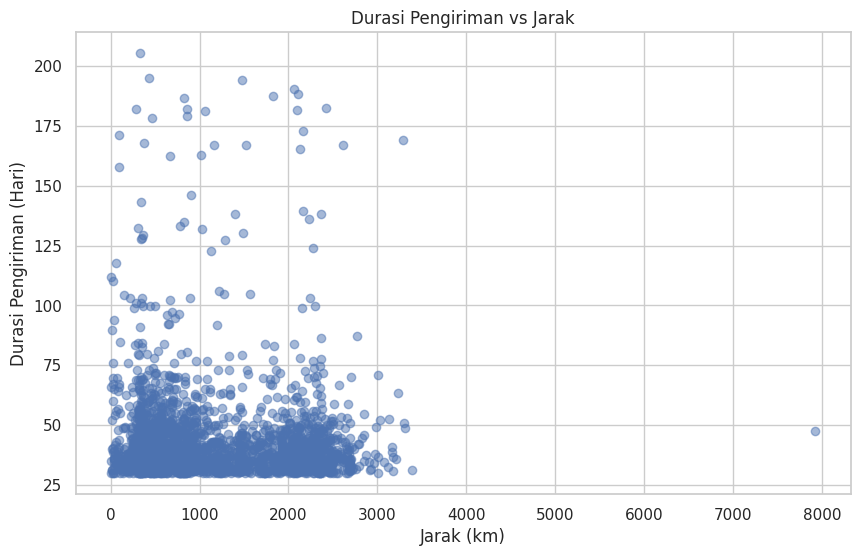

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_orders_clean['distance_km'], filtered_orders_clean['delivery_duration_days'], alpha=0.5)
plt.title('Durasi Pengiriman vs Jarak')
plt.xlabel('Jarak (km)')
plt.ylabel('Durasi Pengiriman (Hari)')
plt.show()


Dari grafik di atas, didapatkan informasi diantaranya:
- Banyak pengiriman dengan jarak di bawah 4000km memiliki durasi 30-100 hari, namun ada ketidakkonsistenan durasi yang ditandai variasi yang signifikan yang menempuh lebih dari 100 hari dalam pengiriman, bahkan ada yang sampai 200 hari.
- Anehnya, pengiriman dengan jarak jauh yang hampir 8000km selesai dalam waktu yang relatif singkat (45-50 hari), dibandingkan pengiriman dengan jarak yang lebih dekat yang bisa memakan waktu hingga 100 hari atau lebih.

## RFM Analysis

Untuk menjawab tiga pertanyaan analisis terakhir, akan digunakan teknik analisis lanjutan bernama RFM analysis.

Sederhananya, RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [70]:
orders_df = pd.merge(orders_df, customers_df[['customer_id', 'customer_unique_id']], on='customer_id', how='left')
orders_df = pd.merge(orders_df, order_items_df[['order_id', 'price']], on='order_id', how='left')

orders_df = orders_df.drop_duplicates(subset=['order_id'], keep='first')

duplicate_orders = orders_df[orders_df.duplicated(subset=['order_id'])]
print(f"Jumlah duplikasi setelah dihapus: {len(duplicate_orders)}")


Jumlah duplikasi setelah dihapus: 0


In [71]:
latest_date = orders_df['order_purchase_timestamp'].max()
orders_df['recency'] = (latest_date - orders_df['order_purchase_timestamp']).dt.days

last_six_months = latest_date - timedelta(days=180)
recent_orders_df = orders_df[orders_df['order_purchase_timestamp'] >= last_six_months]

frequency_df = recent_orders_df.groupby('customer_unique_id').agg(frequency=('order_id', 'nunique')).reset_index()
monetary_df = recent_orders_df.groupby('customer_unique_id').agg(monetary=('price', 'sum')).reset_index()

rfm_df = pd.merge(frequency_df, monetary_df, on='customer_unique_id', how='left')

recency_df = orders_df[['customer_unique_id', 'recency']].drop_duplicates()
rfm_df = pd.merge(rfm_df, recency_df, on='customer_unique_id', how='left')

In [73]:
rfm_df

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163
2,000949456b182f53c18b68d6babc79c1,1,64.89,177
3,000e309254ab1fc5ba99dd469d36bdb4,1,59.90,114
4,000ec5bff359e1c0ad76a81a45cb598f,1,14.96,57
...,...,...,...,...
28756,fff22793223fe80c97a8fd02ac5c6295,1,22.00,113
28757,fff3e1d7bc75f11dc7670619b2e61840,1,54.85,89
28758,fff5eb4918b2bf4b2da476788d42051c,1,175.00,107
28759,fff96bc586f78b1f070da28c4977e810,1,45.00,63


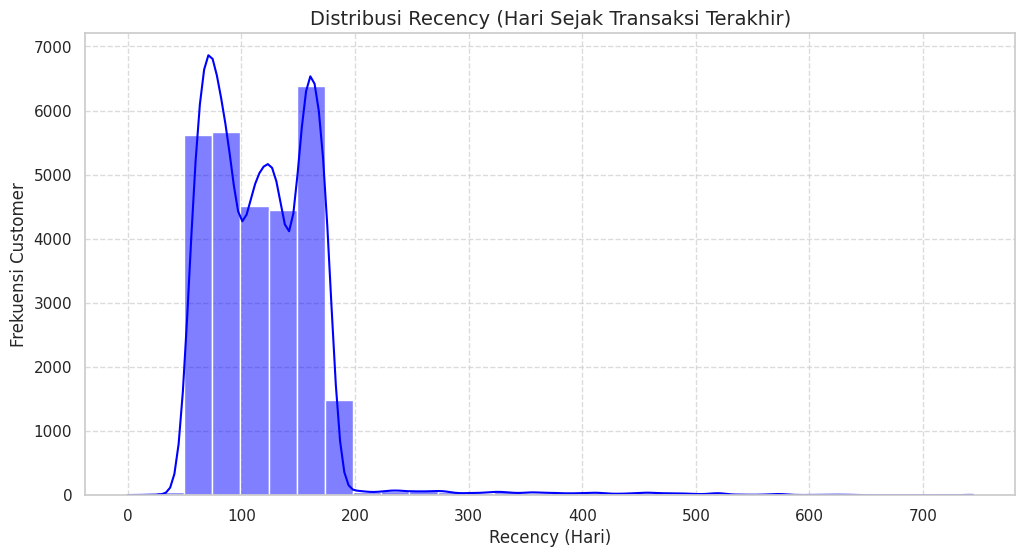

In [75]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm_df['recency'], kde=True, color='blue', bins=30)
plt.title('Distribusi Recency (Hari Sejak Transaksi Terakhir)', fontsize=14)
plt.xlabel('Recency (Hari)', fontsize=12)
plt.ylabel('Frekuensi Customer', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Dari grafik Distribusi Recency di atas, didapatkan informasi pada beberapa periode:
- Grafik menunjukkan bahwa sebagian besar pelanggan memiliki recency antara 50 hingga 200 hari. Ini menunjukkan bahwa mayoritas pelanggan melakukan transaksi terakhir dalam rentang waktu tersebut.
- Ada penurunan signifikan setelah 200 hari, yang mengindikasikan bahwa sejumlah pelanggan mulai menjadi kurang aktif. Hal ini bisa menjadi sinyal potensial untuk risiko churn (penghentian hubungan pelanggan).

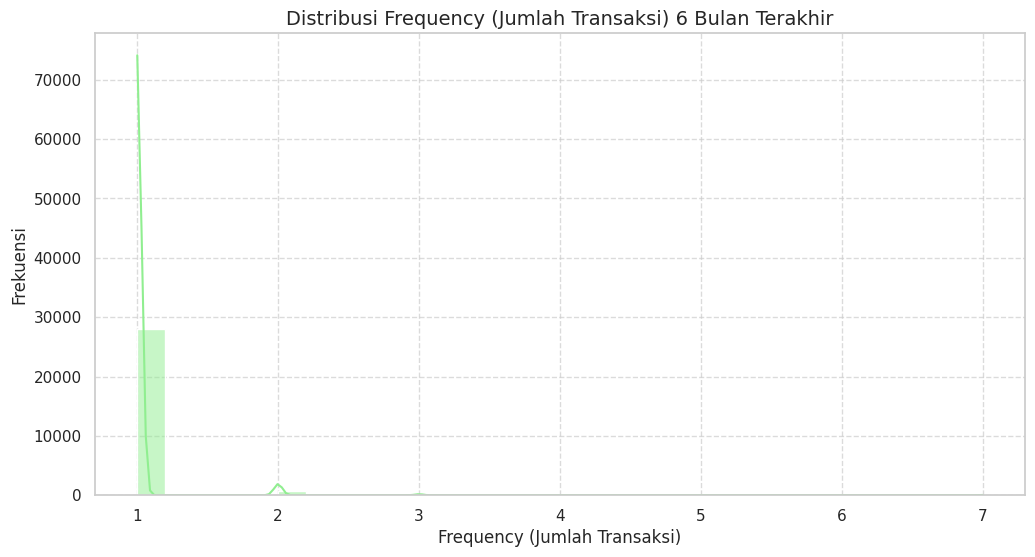

In [76]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm_df['frequency'], kde=True, color='lightgreen', bins=30)
plt.title('Distribusi Frequency (Jumlah Transaksi) 6 Bulan Terakhir', fontsize=14)
plt.xlabel('Frequency (Jumlah Transaksi)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Dari visualisasi Distribusi Frequency di atas didapatkan informasi bahwa:
- Sebagian besar pelanggan memiliki frekuensi transaksi yang rendah, dengan puncak distribusi terletak di sekitar 1 transaksi. Ini menunjukkan bahwa mayoritas pelanggan hanya melakukan satu kali transaksi dalam periode 6 bulan terakhir.
- Ada penurunan signifikan pada frekuensi transaksi di atas 1 transaksi, yang mengindikasikan bahwa sejumlah kecil pelanggan melakukan transaksi berulang.

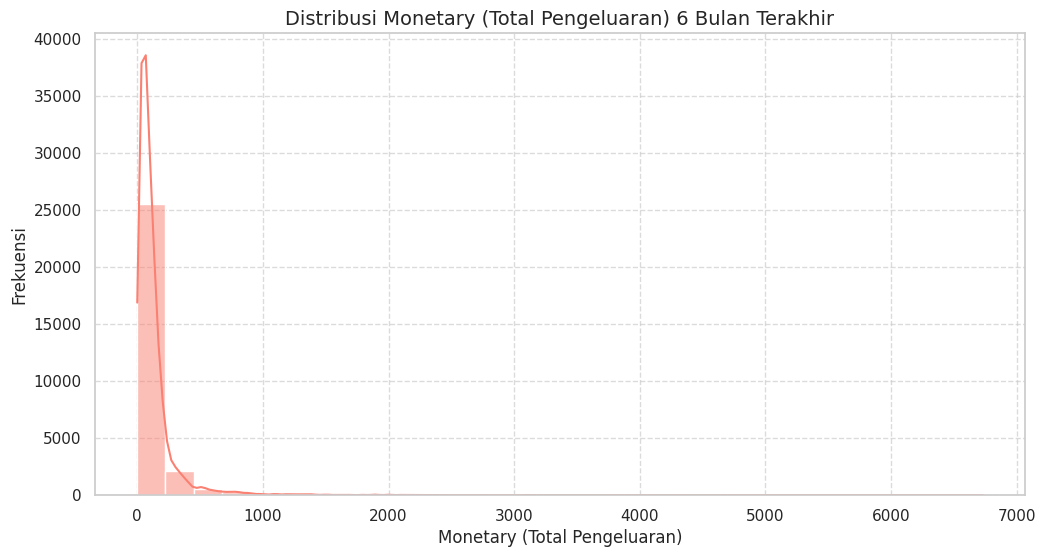

In [77]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm_df['monetary'], kde=True, color='salmon', bins=30)
plt.title('Distribusi Monetary (Total Pengeluaran) 6 Bulan Terakhir', fontsize=14)
plt.xlabel('Monetary (Total Pengeluaran)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Dari grafik Distribusi Monetary di atas, didapatkan beberapa insight sebagai berikut:
- Terlihat bahwa mayoritas pelanggan masuk ke kategori low spender dengan jumlah transaksi tinggi berkisar dari 0-1000. Distribusi juga membentuk pola right skewed, dengan penurunan tajam jumlah pelanggan seiring meningkatnya pengeluaran di atas 1000.
- Mengingat banyaknya jumlah pelanggan dengan pengeluaran rendah, mungkin diperlukan fokus untuk meningkatkan frekuensi transaksi atau menemukan strategi untuk mendorong pengeluaran yang lebih tinggi di antara para pelanggan ini.
- Meskipun sebagian besar pelanggan menghabiskan pengeluaran yang lebih sedikit, masih terdapat kategori dengan pengeluaran antara 2000-7000. Hal ini mungkin disebabkan oleh produk atau layanan kelas atas, dan memahami segmen ini dapat membantu menargetkan pelanggan prioritas atau premium.

## Conclusion

### Pertanyaan Pertama
Produk kategori apa yang memiliki rata-rata pendapatan tertinggi per pesanan dalam 6 bulan terakhir?

**Kesimpulan**

Kategori "computers" memiliki rata-rata pendapatan per pesanan tertinggi dalam 6 bulan terakhir. Hal ini mengindikasikan bahwa produk dalam kategori ini cenderung berharga tinggi dan memiliki kontribusi besar dalam pendapatan, meskipun volume penjualannya terbatas. Sebaliknya, kategori seperti "musical_instruments" menunjukkan volume penjualan yang tinggi namun dengan pendapatan rata-rata yang lebih rendah. Hal ini menunjukkan bahwa strategi bisnis perlu mempertimbangkan kombinasi antara harga produk dan permintaan pasar untuk memaksimalkan pendapatan.

### Pertanyaan Kedua
Metode pembayaran mana yang paling sering digunakan oleh pelanggan, dan apakah metode tersebut memengaruhi nilai rata-rata transaksi?

**Kesimpulan**

Metode pembayaran credit card adalah yang paling sering digunakan oleh pelanggan, dengan rata-rata nominal transaksi tertinggi dibanding metode lainnya. Frekuensi tinggi ini menunjukkan kepercayaan pelanggan terhadap metode ini untuk transaksi bernilai tinggi. Sementara itu, metode seperti boleto lebih sering digunakan untuk transaksi dengan harga lebih terjangkau, dan voucher lebih dominan pada transaksi diskon atau produk murah. Debit Card memiliki frekuensi rendah tetapi nominal transaksi cukup tinggi. Hal ini menunjukkan bahwa penggunaan metode pembayaran berpengaruh pada nilai rata-rata transaksi, dan strategi bisnis perlu mempertimbangkan preferensi pelanggan dalam memilih metode pembayaran.

### Pertanyaan Ketiga
Apa pengaruh jarak pengiriman terhadap durasi pengiriman yang lebih dari 30 hari?

**Kesimpulan**

Jarak pengiriman memiliki pengaruh yang tidak langsung terhadap durasi, dengan jarak pendek sering kali memiliki durasi lebih lama daripada jarak jauh. Kemudain ketidakkonsistenan dalam durasi pengiriman, terutama pada jarak pendek, menujukkan adanya masalah logistik dan operasional yang perlu diperbaiki.

Perlu adanya perbaikan dalam efisiensi logistik untuk pengiriman lokal dan jarak pendek, termasuk mengidentifikasi hambatan spesifik pada rute pengiriman lokal yang menyebabkan keterlambatan yang signifikan.

### Pertanyaan Keempat
Kapan terakhir pelanggan melakukan transaksi?

**Kesimpulan**

Sebagian besar pelanggan melakukan transaksi terakhir dalam rentang waktu 50 hingga 200 hari, yang menunjukkan tingkat aktivitas yang tinggi. Namun, setelah 200 hari, terjadi penurunan aktivitas yang signifikan. Hal ini menunjukkan bahwa periode ini adalah periode kritis untuk retensi pelanggan, dan bisnis perlu merancang strategi re-engagement untuk mencegah churn.

### Pertanyaan Kelima
Seberapa sering seorang pelanggan melakukan pembelian dalam 6 bulan terakhir?

**Kesimpulan**

Mayoritas pelanggan hanya melakukan 1 kali transaksi dalam 6 bulan terakhir, yang mencerminkan tingkat repeat order yang rendah. Hal ini mengindikasikan perlunya strategi peningkatan loyalitas pelanggan, seperti program reward atau promosi untuk mendorong pelanggan melakukan pembelian ulang.

### Pertanyaan Keenam
Berapa banyak uang yang dihabiskan pelanggan dalam 6 bulan terakhir?

**Kesimpulan**

Mayoritas pelanggan menghabiskan uang di bawah 1000 dalam 6 bulan terakhir, menunjukkan dominasi segmen dengan pengeluaran rendah. Namun, terdapat segmen kecil pelanggan premium dengan pengeluaran antara 2000 hingga 7000. Fokus pada kedua segmen ini, baik melalui promosi untuk meningkatkan pengeluaran pelanggan yang masih rendah maupun pendekatan eksklusif untuk pelanggan premium dapat menjadi strategi yang efektif untuk meningkatkan pendapatan.

## Menggabungkan Dataset untuk Dashboard

In [79]:
orders_df = orders_df.drop_duplicates(subset='order_id', keep='first')
customers_df = customers_df.drop_duplicates(subset='customer_id', keep='first')
order_items_df = order_items_df.drop_duplicates(subset='order_id', keep='first')
products_df = products_df.drop_duplicates(subset='product_id', keep='first')
order_rvw_df = order_rvw_df.drop_duplicates(subset='order_id', keep='first')

orders_customers = pd.merge(
    orders_df[['order_id', 'customer_id', 'order_purchase_timestamp', 'order_status']],
    customers_df[['customer_id', 'customer_unique_id', 'customer_city']],
    on='customer_id',
    how='inner'
)
orders_customers = orders_customers.drop_duplicates(subset=['order_id', 'customer_unique_id'], keep='first')

duplicate_orders_customers = orders_customers[orders_customers.duplicated(subset=['order_id'])]
print(f"Duplikasi setelah merge orders_customers: {len(duplicate_orders_customers)}")

orders_customers_items = pd.merge(
    orders_customers,
    order_items_df[['order_id', 'price', 'product_id']],
    on='order_id',
    how='inner'
)
orders_customers_items = orders_customers_items.drop_duplicates(subset=['order_id'], keep='first')

duplicate_orders_items = orders_customers_items[orders_customers_items.duplicated(subset=['order_id'])]
print(f"Duplikasi setelah merge orders_customers_items: {len(duplicate_orders_items)}")

orders_customers_items_products = pd.merge(
    orders_customers_items,
    products_df[['product_id', 'product_category_name']],
    on='product_id',
    how='left'
)
orders_customers_items_products = orders_customers_items_products.drop_duplicates(subset=['order_id'], keep='first')

duplicate_products = orders_customers_items_products[orders_customers_items_products.duplicated(subset=['order_id'])]
print(f"Duplikasi setelah merge orders_customers_items_products: {len(duplicate_products)}")

all_data = pd.merge(
    orders_customers_items_products,
    order_rvw_df[['order_id', 'review_score']],
    on='order_id',
    how='left'
)
all_data = all_data.drop_duplicates(subset=['order_id'], keep='first')

# Final check duplikasi
duplicate_all_data = all_data[all_data.duplicated(subset=['order_id'])]
print(f"Duplikasi di all_data: {len(duplicate_all_data)}")
print(f"Jumlah data akhir tanpa duplikasi: {len(all_data)}")


Duplikasi setelah merge orders_customers: 0
Duplikasi setelah merge orders_customers_items: 0
Duplikasi setelah merge orders_customers_items_products: 0
Duplikasi di all_data: 0
Jumlah data akhir tanpa duplikasi: 98666


In [80]:
all_data

,order_id,customer_id,order_purchase_timestamp,order_status,customer_unique_id,customer_city,price,product_id,product_category_name,review_score
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19,shipped,b7d76e111c89f7ebf14761390f0f7d17,boa vista,39.99,c1488892604e4ba5cff5b4eb4d595400,moveis_decoracao,1.0
1,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:34,canceled,4854e9b3feff728c13ee5fc7d1547e92,passo fundo,59.50,f3c2d01a84c947b078e32bbef0718962,telefonia,1.0
2,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,delivered,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,44.99,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude,1.0
3,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:52,canceled,0eb1ee9dba87f5b36b4613a65074337c,sao paulo,100.00,d2998d7ced12f83f9b832f33cf6507b6,bebes,1.0
4,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:50,delivered,32ea3bdedab835c3aa6cb68ce66565ef,sao paulo,29.90,3ae08df6bcbfe23586dd431c40bddbb7,relogios_presentes,4.0
...,...,...,...,...,...,...,...,...,...,...
98661,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23,delivered,5c58de6fb80e93396e2f35642666b693,curitiba,209.00,2b4472df15512a2825ae86fd9ae79335,moveis_cozinha_area_de_servico_jantar_e_jardim,5.0
98662,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28,delivered,7febafa06d9d8f232a900a2937f04338,paracatu,45.90,bdcf6a834e8faa30dac3886c7a58e92e,beleza_saude,5.0
98663,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00,delivered,b701bebbdf478f5500348f03aff62121,sao caetano do sul,24.90,c7f27c5bef2338541c772b5776403e6a,artigos_de_festas,3.0
98664,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,2018-08-29 15:00:37,delivered,24ac2b4327e25baf39f2119e4228976a,limeira,84.99,d04857e7b4b708ee8b8b9921163edba3,informatica_acessorios,5.0


In [82]:
all_data.to_csv('all_data.csv', index=False)